# Import Databases 

In [1]:
from pandas import ExcelWriter

import brightway2 as bw
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy as sp
import time

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
bw.projects.set_current("SOFC")  # setup and name project

<IPython.core.display.Javascript object>

In [3]:
bw.bw2setup()

Biosphere database already present!!! No setup is needed


<IPython.core.display.Javascript object>

In [4]:
if "ecoinvent 3.6" not in bw.databases:
    link = "D:\ecoinvent3.6cutoffecoSpold02\datasets"
    ei36 = bw.SingleOutputEcospold2Importer(link, "ecoinvent 3.6", use_mp=False)
    ei36.apply_strategies()
    ei36.statistics()
    ei36.write_database()

<IPython.core.display.Javascript object>

In [5]:
len(bw.Database("ecoinvent 3.6"))  # display number of act in DB

18121

<IPython.core.display.Javascript object>

In [6]:
eidb = bw.Database("ecoinvent 3.6")
type(eidb)

bw2data.backends.peewee.database.SQLiteBackend

<IPython.core.display.Javascript object>

# Building LCA Matrices

In [7]:
structured_array = np.load(eidb.filepath_processed())
pd.DataFrame(structured_array).head()

,input,output,row,col,type,uncertainty_type,amount,loc,scale,shape,minimum,maximum,negative
0,1,1,4294967295,4294967295,1,0,0.065686,0.065686,NaN,NaN,NaN,NaN,False
1,1,1,4294967295,4294967295,0,0,1.000000,1.000000,NaN,NaN,NaN,NaN,False
2,1,641,4294967295,4294967295,1,0,1.000000,1.000000,NaN,NaN,NaN,NaN,False
3,1,9780,4294967295,4294967295,1,2,747.526978,6.616770,0.117047,NaN,NaN,NaN,False
4,1,11495,4294967295,4294967295,1,2,0.000013,-11.282328,0.206398,NaN,NaN,NaN,False


<IPython.core.display.Javascript object>

In [8]:
pd.Series(bw.mapping).head()

ecoinvent 3.6  9866f4f7ef49f93173b854e0f4546155    1
               dc3220628f718eaacb12446e5c1f62e1    2
               c77f91e383dcc1ba4ca8fb9424cea758    3
               eb1f615abe8bd14c9709e24c606b5588    4
               1951bf0c2a1297b2ba3412581e4c6623    5
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
eidb.metadata  # 数据库类型

{'format': 'Ecospold2',
 'depends': ['biosphere3'],
 'backend': 'sqlite',
 'number': 18121,
 'modified': '2020-09-20T21:42:24.180057',
 'searchable': True,
 'processed': '2020-09-20T21:44:46.057789'}

<IPython.core.display.Javascript object>

# Setup Foreground Database 

In [10]:
# Setup Foreground Database for SOFC
SOFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\SOFC_Import.xlsx"
)
SOFC.apply_strategies(verbose=False)
SOFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
SOFC.statistics(print_stats=False)
# check unlinked exchanges
SOFC.write_excel()
SOFC.write_database()

Extracted 1 worksheets in 0.10 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-SOFC-import.xlsx


0% [################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:00
  Finished: 01/10/2022 14:30:00
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 2.92
Created database: SOFC import


<IPython.core.display.Javascript object>

In [11]:
# Setup database foreground for MCFC
MCFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\MCFC_Import.xlsx"
)
MCFC.apply_strategies(verbose=False)
MCFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
MCFC.statistics(print_stats=False)
MCFC.write_excel()
MCFC.write_database()

Extracted 1 worksheets in 0.03 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-MCFC-import.xlsx


0% [############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:03
  Finished: 01/10/2022 14:30:03
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 3.02
Created database: MCFC import


<IPython.core.display.Javascript object>

In [12]:
# Setup database foreground for PAFC
PAFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\PAFC_Import.xlsx"
)
PAFC.apply_strategies(verbose=False)
PAFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
PAFC.statistics(print_stats=False)
PAFC.write_excel()
PAFC.write_database()

Extracted 1 worksheets in 0.05 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-PAFC-import.xlsx


0% [##############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:06
  Finished: 01/10/2022 14:30:06
  Total time elapsed: 00:00:00
  CPU %: 195.30
  Memory %: 3.11
Created database: PAFC import


<IPython.core.display.Javascript object>

In [13]:
# Setup database foreground for PEMFC
PEMFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\PEMFC_Import.xlsx"
)
PEMFC.apply_strategies(verbose=False)
PEMFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
PEMFC.statistics(print_stats=False)
PEMFC.write_excel()
PEMFC.write_database()

Extracted 1 worksheets in 0.32 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-PEMFC-import.xlsx


0% [##############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:08
  Finished: 01/10/2022 14:30:08
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.20
Created database: PEMFC import


<IPython.core.display.Javascript object>

In [14]:
# Setup database foreground for RE_fuel cell manufacturing

# PEMFC
RE_PEMFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\RE_PEMFC_Import.xlsx"
)

# SOFC
RE_SOFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\RE_SOFC_Import.xlsx"
)

# MCFC
RE_MCFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\RE_MCFC_Import.xlsx"
)

# PAFC
RE_PAFC = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\RE_PAFC_Import.xlsx"
)

RE_databases = [RE_SOFC, RE_MCFC, RE_PAFC, RE_PEMFC]

for database in RE_databases:
    database.apply_strategies(verbose=False)
    database.match_database(
        "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
    )
    database.statistics(print_stats=False)
    # database.write_excel()
    database.write_database(verbose=False)

D:\Users\sheep\anaconda3\lib\site-packages\bw2io\importers\excel.py:41: UserWarning: Invalid first cell (A1) in worksheet Sheet2
  warnings.warn("Invalid first cell (A1) in worksheet {}".format(sheet))
D:\Users\sheep\anaconda3\lib\site-packages\bw2io\importers\excel.py:41: UserWarning: Invalid first cell (A1) in worksheet Sheet3
  warnings.warn("Invalid first cell (A1) in worksheet {}".format(sheet))


Extracted 1 worksheets in 0.07 seconds
Extracted 1 worksheets in 0.04 seconds
Extracted 1 worksheets in 0.01 seconds
Extracted 1 worksheets in 0.04 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:
0% [#############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:11
  Finished: 01/10/2022 14:30:11
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 3.28
Created database: RE SOFC import
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:
0% [#########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:13
  Finished: 01/10/2022 14:30:13
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 3.35
Created database: RE MCFC import
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:
0% [#########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:15
  Finished: 01/10/2022 14:30:15
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 3.45
Created database: RE PAFC import
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:
0% [#########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:18
  Finished: 01/10/2022 14:30:18
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.49
Created database: RE PEMFC import


<IPython.core.display.Javascript object>

In [15]:
# setup database for operation
link = r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\operation_import.xlsx"
op_db = bw.ExcelImporter(link)
op_db.apply_strategies(verbose=False)
op_db.match_database(
    db_name="ecoinvent 3.6", fields=["name", "unit", "location", "uncertainty"]
)
op_db.statistics()
op_db.write_excel()
op_db.write_database()

Extracted 1 worksheets in 0.12 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


5 datasets
23 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-operation.xlsx


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:20
  Finished: 01/10/2022 14:30:20
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.56
Created database: operation


<IPython.core.display.Javascript object>

In [16]:
# setup database for RE fuel cell RE_operation
link = r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\RE_operation_import.xlsx"
RE_op_db = bw.ExcelImporter(link)
RE_op_db.apply_strategies(verbose=False)
RE_op_db.match_database(
    db_name="ecoinvent 3.6",
    fields=["name", "unit", "location", "reference product", "uncertainty"],
)
RE_op_db.statistics()
RE_op_db.write_excel()
RE_op_db.write_database()

Extracted 1 worksheets in 0.12 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


6 datasets
24 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-RE-operation.xlsx


0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:23
  Finished: 01/10/2022 14:30:23
  Total time elapsed: 00:00:00
  CPU %: 195.30
  Memory %: 3.58
Created database: RE operation


<IPython.core.display.Javascript object>

In [17]:
# setup database for system expansion
sys_expan = bw.ExcelImporter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\BW2Import\SystemExpansion.xlsx"
)
sys_expan.apply_strategies(verbose=False)
sys_expan.match_database(
    "ecoinvent 3.6", fields=["name", "unit", "location", "uncertainty"]
)
sys_expan.statistics()
sys_expan.write_excel()
sys_expan.write_database()

Extracted 1 worksheets in 0.05 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


5 datasets
8 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\sheep\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-systemExpansion.xlsx


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/10/2022 14:30:25
  Finished: 01/10/2022 14:30:25
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 3.60
Created database: systemExpansion


<IPython.core.display.Javascript object>

In [18]:
bw.databases

Databases dictionary with 13 object(s):
	MCFC import
	PAFC import
	PEMFC import
	RE MCFC import
	RE PAFC import
	RE PEMFC import
	RE SOFC import
	RE operation
	SOFC import
	biosphere3
	ecoinvent 3.6
	operation
	systemExpansion

<IPython.core.display.Javascript object>

In [19]:
# instantiate database object
# databases for natural gas fuel cells
SOFC_import = bw.Database("SOFC import")
MCFC_import = bw.Database("MCFC import")
PAFC_import = bw.Database("PAFC import")
PEMFC_import = bw.Database("PEMFC import")
op_db_import = bw.Database("operation")

# databases for renewable energy fuel cells
RE_SOFC_import = bw.Database("RE SOFC import")
RE_MCFC_import = bw.Database("RE MCFC import")
RE_PAFC_import = bw.Database("RE PAFC import")
RE_PEMFC_import = bw.Database("RE PEMFC import")
RE_op_db_import = bw.Database("RE operation")

# system expansion
sys_exp_import = bw.Database("systemExpansion")

<IPython.core.display.Javascript object>

In [20]:
list(RE_op_db_import)

['electricity_sofc' (kilowatt hour, GLO, None),
 'electricity_pemfc' (kilowatt hour, GLO, None),
 'electricity_pafc' (kilowatt hour, GLO, None),
 'electricity_mcfc' (kilowatt hour, GLO, None),
 'hydrogen production' (kilogram, RoW, None),
 'electricity production' (pcs, GLO, None)]

<IPython.core.display.Javascript object>

# Setup LCA Calc 

## Setup functional unit 

In [21]:
# find activity name
def find_by_name(name_ls, database):
    possibles = []
    for activity in database:
        if activity["name"] in name_ls:
            possibles.append(activity)
        else:
            pass

        # assert len(possibles) == 1, "Found {} possibile activities".format(len(possibles))
    return possibles

<IPython.core.display.Javascript object>

In [22]:
foreground_name = [
    "Cell stack, pcs",
    "Fuel Processor, pcs",
    "Power Conditioining, pcs",
    "Thermal Management, pcs",
    "Manufacturing",
    "Disposal_scen1",
    "Disposal_scen2",
    "Disposal_scen3",
]

RE_foreground_name = [
    "Cell stack, pcs",
    "Power Conditioining, pcs",
    "Thermal Management, pcs",
    "Manufacturing",
    "Disposal_scen1",
    "Disposal_scen2",
    "Disposal_scen3",
]

op_foreground_name = [
    "electricity_sofc",
    "electricity_mcfc",
    "electricity_pafc",
    "electricity_pemfc",
]

sys_expan_name = [
    "system expansion_sofc",
    "system expansion_mcfc",
    "system expansion_pafc",
    "system expansion_pemfc",
]

<IPython.core.display.Javascript object>

In [23]:
def fu(database, foreground_name=foreground_name):
    foreground = find_by_name(foreground_name, database)
    fu_ls = [{foreground[x]: 1} for x in range(len(foreground))]
    return fu_ls

<IPython.core.display.Javascript object>

In [24]:
# create functional unit for FC
SOFC_FU = fu(database=SOFC_import)
MCFC_FU = fu(database=MCFC_import)
PAFC_FU = fu(database=PAFC_import)
PEMFC_FU = fu(database=PEMFC_import)

operation_FU = fu(database=op_db_import, foreground_name=op_foreground_name)

# create list of functional unit for RE FC
RE_SOFC_FU = fu(database=RE_SOFC_import)
RE_MCFC_FU = fu(database=RE_MCFC_import)
RE_PAFC_FU = fu(database=RE_PAFC_import)
RE_PEMFC_FU = fu(database=RE_PEMFC_import)

RE_operation_FU = fu(database=RE_op_db_import, foreground_name=op_foreground_name)

<IPython.core.display.Javascript object>

In [25]:
# Setup FU for natural gas production
ng_prod = [
    act
    for act in eidb
    if "market for natural gas, low pressure" in act["name"]
    and "RoW" in act["location"]
]
ng_prod_FU = [{ng_prod[0]: 1}]
ng_prod_FU

[{'market for natural gas, low pressure' (cubic meter, RoW, None): 1}]

<IPython.core.display.Javascript object>

In [26]:
sys_expan_FU = fu(database=sys_exp_import, foreground_name=sys_expan_name)
sys_expan_FU

[{'system expansion_pemfc' (pcs, GLO, None): 1},
 {'system expansion_sofc' (pcs, GLO, None): 1},
 {'system expansion_pafc' (pcs, GLO, None): 1},
 {'system expansion_mcfc' (pcs, GLO, None): 1}]

<IPython.core.display.Javascript object>

## Setup LCIA 

In [27]:
ReCiPe = [method for method in bw.methods if 'ReCiPe Midpoint (H) V1.13' in str(method) 
                                          and 'w/o LT' not in str(method)
                                          and 'no LT' not in str(method)
                                          and 'obsolete' not in str(method)]
ReCiPe_end = [method for method in bw.methods if 'ReCiPe Endpoint (H,A)' in str(method)
                                                 and 'total' in str(method)][1] # point based total 
ReCiPe.append(ReCiPe_end)
ReCiPe


[('ReCiPe Midpoint (H) V1.13', 'freshwater ecotoxicity', 'FETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'human toxicity', 'HTPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'marine ecotoxicity', 'METPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial ecotoxicity', 'TETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'metal depletion', 'MDP'),
 ('ReCiPe Midpoint (H) V1.13', 'agricultural land occupation', 'ALOP'),
 ('ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100'),
 ('ReCiPe Midpoint (H) V1.13', 'fossil depletion', 'FDP'),
 ('ReCiPe Midpoint (H) V1.13', 'freshwater eutrophication', 'FEP'),
 ('ReCiPe Midpoint (H) V1.13', 'ionising radiation', 'IRP_HE'),
 ('ReCiPe Midpoint (H) V1.13', 'marine eutrophication', 'MEP'),
 ('ReCiPe Midpoint (H) V1.13', 'natural land transformation', 'NLTP'),
 ('ReCiPe Midpoint (H) V1.13', 'ozone depletion', 'ODPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'particulate matter formation', 'PMFP'),
 ('ReCiPe Midpoint (H) V1.13', 'photochemical oxidant formation', 'POFP'),
 ('ReCiPe Mi

<IPython.core.display.Javascript object>

In [28]:
indicators = [ReCiPe[6], ReCiPe[7], ReCiPe[13], ReCiPe[15]]
indicators

[('ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100'),
 ('ReCiPe Midpoint (H) V1.13', 'fossil depletion', 'FDP'),
 ('ReCiPe Midpoint (H) V1.13', 'particulate matter formation', 'PMFP'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial acidification', 'TAP100')]

<IPython.core.display.Javascript object>

In [29]:
ia_cat = [
    "FETP",
    "HTP",
    "METP",
    "TETP",
    "MDP",
    "ALOP",
    "GWP100",
    "FDP",
    "FEP",
    "IRP",
    "MEP",
    "NLTP",
    "ODP",
    "PMFP",
    "POFP",
    "TAP100",
    "ULOP",
    "WDP",
    "Total",
]
ia_cat1 = ["GWP", "FDP", "PMFP", "AP"]

<IPython.core.display.Javascript object>

## Calc LCIA results 

In [30]:
# setup FU and impact assessment method and calculate results
def LCIA_results(FU_ls, ia=ReCiPe, index_ls=foreground_name):
    bw.calculation_setups["FC_LCIA"] = {"inv": FU_ls, "ia": ia}
    multi_LCA = bw.MultiLCA("FC_LCIA").results
    LCIA_results = pd.DataFrame(
        data=multi_LCA, columns=ia, index=[list(i.keys())[0]["name"] for i in FU_ls]
    )
    return LCIA_results

<IPython.core.display.Javascript object>

In [31]:
# Natural gas FC LCIA results
SOFC_LCIA_results = LCIA_results(SOFC_FU).reindex(foreground_name)  # SOFC manufacturing
MCFC_LCIA_results = LCIA_results(MCFC_FU).reindex(foreground_name)  # MCFC
PAFC_LCIA_results = LCIA_results(PAFC_FU).reindex(foreground_name)  # PAFC
PEMFC_LCIA_results = LCIA_results(PEMFC_FU).reindex(foreground_name)  # PEMFC
operation_LCIA_results = LCIA_results(
    operation_FU, index_ls=op_foreground_name
).reindex(
    op_foreground_name
)  # operation
sys_expan_LCIA_results = LCIA_results(sys_expan_FU, index_ls=sys_expan_name).reindex(
    sys_expan_name
)

<IPython.core.display.Javascript object>

In [32]:
RE_SOFC_LCIA_results = LCIA_results(RE_SOFC_FU).reindex(RE_foreground_name) # RE SOFC
RE_MCFC_LCIA_results = LCIA_results(RE_MCFC_FU).reindex(RE_foreground_name) # RE MCFC
RE_PAFC_LCIA_results = LCIA_results(RE_PAFC_FU).reindex(RE_foreground_name) # RE PAFC
RE_PEMFC_LCIA_results = LCIA_results(RE_PEMFC_FU).reindex(RE_foreground_name) # RE PEMFC

RE_operation_LCIA_results = LCIA_results(
    RE_operation_FU, index_ls=op_foreground_name
).reindex(
    op_foreground_name
)  # operation



<IPython.core.display.Javascript object>

# Results including operation phase

In [33]:
def merge(
    LCIA_results, techName, RE=False
):  # merge manufacturing, operation, and system expansion
    if RE == True:
        op = RE_operation_LCIA_results.loc["electricity_" + techName]
    if RE == False:
        op = operation_LCIA_results.loc["electricity_" + techName]
    sys_expan = sys_expan_LCIA_results.loc["system expansion_" + techName]
    full_LCIA = LCIA_results.append(op).append(sys_expan)

    return full_LCIA

<IPython.core.display.Javascript object>

In [34]:
sofc_ia = merge(SOFC_LCIA_results, techName="sofc")
mcfc_ia = merge(MCFC_LCIA_results, techName="mcfc")
pafc_ia = merge(PAFC_LCIA_results, techName="pafc")
pemfc_ia = merge(PEMFC_LCIA_results, techName="pemfc")

<IPython.core.display.Javascript object>

In [35]:
RE_sofc_ia = merge(RE_SOFC_LCIA_results, techName="sofc", RE=True)
RE_mcfc_ia = merge(RE_MCFC_LCIA_results, techName="mcfc", RE=True)
RE_pafc_ia = merge(RE_PAFC_LCIA_results, techName="pafc", RE=True)
RE_pemfc_ia = merge(RE_PEMFC_LCIA_results, techName="pemfc", RE=True)

<IPython.core.display.Javascript object>

In [36]:
with ExcelWriter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\NGFC_export.xlsx"
) as writer:
    sofc_ia.to_excel(
        writer,
        sheet_name="SOFC",
        encoding="utf-8",
    )
    mcfc_ia.to_excel(
        writer,
        sheet_name="MCFC",
        encoding="utf-8",
    )
    pafc_ia.to_excel(
        writer,
        sheet_name="PAFC",
        encoding="utf-8",
    )
    pemfc_ia.to_excel(
        writer,
        sheet_name="PEMFC",
        encoding="utf-8",
    )

<IPython.core.display.Javascript object>

In [37]:
with ExcelWriter(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\REFC_export.xlsx"
) as writer:
    RE_sofc_ia.to_excel(
        writer,
        sheet_name="RE_SOFC",
        encoding="utf-8",
    )
    RE_mcfc_ia.to_excel(
        writer,
        sheet_name="RE_MCFC",
        encoding="utf-8",
    )
    RE_pafc_ia.to_excel(
        writer,
        sheet_name="RE_PAFC",
        encoding="utf-8",
    )
    RE_pemfc_ia.to_excel(
        writer,
        sheet_name="RE_PEMFC",
        encoding="utf-8",
    )

<IPython.core.display.Javascript object>

# Monte Carlo Simulation of Uncertainty

In [38]:
# setup MonteCarlo Calc
def find_act4mc(name, database):
    act_name = [act for act in database if name in act["name"]][0]
    return act_name


fc_mc_name = [
    "manufacturing_sofc",
    "manufacturing_mcfc",
    "manufacturing_pafc",
    "manufacturing_pemfc",
]

<IPython.core.display.Javascript object>

##  MC uncertainty in Manufacturing phase

In [39]:
# One functional unit, multi impact category
def multiImpactMonteCarloLCA(functional_unit, list_methods, iterations):
    # Step 1
    MC_lca = bw.MonteCarloLCA(functional_unit)
    MC_lca.lci()
    # Step 2
    C_matrices = {}
    # Step 3
    for method in list_methods:
        MC_lca.switch_method(method)
        C_matrices[method] = MC_lca.characterization_matrix
    # Step 4
    results = np.empty((len(list_methods), iterations))
    # Step 5
    for iteration in range(iterations):
        next(MC_lca)
        for method_index, method in enumerate(list_methods):
            results[method_index, iteration] = (
                C_matrices[method] * MC_lca.inventory
            ).sum()
    return results


# define the LCIA methods, functional unit, and the number of iterations
sofc_FU = {find_act4mc(fc_mc_name[0], SOFC_import): 1}
mcfc_FU = {find_act4mc(fc_mc_name[1], MCFC_import): 1}
pafc_FU = {find_act4mc(fc_mc_name[2], PAFC_import): 1}
pemfc_FU = {find_act4mc(fc_mc_name[3], PEMFC_import): 1}

RE_sofc_FU = {find_act4mc(fc_mc_name[0], RE_SOFC_import): 1}
RE_mcfc_FU = {find_act4mc(fc_mc_name[1], RE_MCFC_import): 1}
RE_pafc_FU = {find_act4mc(fc_mc_name[2], RE_PAFC_import): 1}
RE_pemfc_FU = {find_act4mc(fc_mc_name[3], RE_PEMFC_import): 1}

iterations = 1000

<IPython.core.display.Javascript object>

In [112]:
# monte carlo calculation for NG fuel cell
sofc_pmc_results = multiImpactMonteCarloLCA(sofc_FU, indicators, iterations)
mcfc_pmc_results = multiImpactMonteCarloLCA(mcfc_FU, indicators, iterations)
pafc_pmc_results = multiImpactMonteCarloLCA(pafc_FU, indicators, iterations)
pemfc_pmc_results = multiImpactMonteCarloLCA(pemfc_FU, indicators, iterations)

df_sofc_pmc = pd.DataFrame(sofc_pmc_results)
df_mcfc_pmc = pd.DataFrame(mcfc_pmc_results)
df_pafc_pmc = pd.DataFrame(pafc_pmc_results)
df_pemfc_pmc = pd.DataFrame(pemfc_pmc_results)
df_pmc = pd.concat([df_sofc_pmc, df_mcfc_pmc, df_pafc_pmc, df_pemfc_pmc], axis=0)

df_pmc.to_excel(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\pmc_primary.xlsx"
)

<IPython.core.display.Javascript object>

In [130]:
# monte carlo calculation for RE fuel cell
RE_sofc_pmc_results = multiImpactMonteCarloLCA(RE_sofc_FU, indicators, iterations)
RE_mcfc_pmc_results = multiImpactMonteCarloLCA(RE_mcfc_FU, indicators, iterations)
RE_pafc_pmc_results = multiImpactMonteCarloLCA(RE_pafc_FU, indicators, iterations)
RE_pemfc_pmc_results = multiImpactMonteCarloLCA(RE_pemfc_FU, indicators, iterations)

RE_df_sofc_pmc = pd.DataFrame(RE_sofc_pmc_results)
RE_df_mcfc_pmc = pd.DataFrame(RE_mcfc_pmc_results)
RE_df_pafc_pmc = pd.DataFrame(RE_pafc_pmc_results)
RE_df_pemfc_pmc = pd.DataFrame(RE_pemfc_pmc_results)
RE_df_pmc = pd.concat(
    [RE_df_sofc_pmc, RE_df_mcfc_pmc, RE_df_pafc_pmc, RE_df_pemfc_pmc], axis=0
)



NameError: name 'df_pmc' is not defined

<IPython.core.display.Javascript object>

In [131]:
RE_df_pmc.to_excel(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\RE_pmc_primary.xlsx"
)

<IPython.core.display.Javascript object>

## MC uncertainty in operational phase

In [105]:
# system operation monte carlo
sofc_op_pmc = multiImpactMonteCarloLCA(operation_FU[0], indicators, iterations)
mcfc_op_pmc = multiImpactMonteCarloLCA(operation_FU[1], indicators, iterations)
pafc_op_pmc = multiImpactMonteCarloLCA(operation_FU[2], indicators, iterations)
pemfc_op_pmc = multiImpactMonteCarloLCA(operation_FU[3], indicators, iterations)

op_pmc = pd.concat(
    [
        pd.DataFrame(sofc_op_pmc),
        pd.DataFrame(mcfc_op_pmc),
        pd.DataFrame(pafc_op_pmc),
        pd.DataFrame(pemfc_op_pmc),
    ]
)
op_pmc.to_excel(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\op_pmc.xlsx"
)

<IPython.core.display.Javascript object>

In [38]:
# system operation monte carlo for RE fuel cells
RE_sofc_op_pmc = multiImpactMonteCarloLCA(RE_operation_FU[0], indicators, iterations)
RE_mcfc_op_pmc = multiImpactMonteCarloLCA(RE_operation_FU[1], indicators, iterations)
RE_pafc_op_pmc = multiImpactMonteCarloLCA(RE_operation_FU[2], indicators, iterations)
RE_pemfc_op_pmc = multiImpactMonteCarloLCA(RE_operation_FU[3], indicators, iterations)

RE_op_pmc = pd.concat(
    [
        pd.DataFrame(RE_sofc_op_pmc),
        pd.DataFrame(RE_mcfc_op_pmc),
        pd.DataFrame(RE_pafc_op_pmc),
        pd.DataFrame(RE_pemfc_op_pmc),
    ]
)
RE_op_pmc.to_excel(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\RE_op_pmc.xlsx"
)

<IPython.core.display.Javascript object>

## MC for system expansion 

In [ ]:
# system expansion monte carlo
sofc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[0], indicators, iterations)
mcfc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[1], indicators, iterations)
pafc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[2], indicators, iterations)
pemfc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[3], indicators, iterations)

In [ ]:
expan_pmc = pd.concat(
    [
        pd.DataFrame(sofc_expan_pmc),
        pd.DataFrame(mcfc_expan_pmc),
        pd.DataFrame(pafc_expan_pmc),
        pd.DataFrame(pemfc_expan_pmc),
    ]
)
expan_pmc.to_excel(
    r"D:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\expan_pmc.xlsx"
)

## Data processing and visualisation 

### High bound low bound of NG Fuel cells

In [40]:
allocation_factor = np.reshape([0.7008, 0.6413, 0.5887, 0.5239], (4, 1))
lifetime = np.reshape([6, 5, 15, 10], (4, 1))
lifetime

array([[ 6],
       [ 5],
       [15],
       [10]])

<IPython.core.display.Javascript object>

In [41]:
# read pmc_results from exported excelfile
with pd.ExcelFile(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\pmc_primary.xlsx"
) as xls:
    manu_pmc = pd.read_excel(xls, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
manu_gwp_pmc = manu_pmc.iloc[ls[:, 0]]
manu_fdp_pmc = manu_pmc.iloc[ls[:, 1]]
manu_pmfp_pmc = manu_pmc.iloc[ls[:, 2]]
manu_ap_pmc = manu_pmc.iloc[ls[:, 3]]

with pd.ExcelFile(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\op_pmc.xlsx"
) as op:
    op_pmc = pd.read_excel(op, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
op_gwp_pmc = op_pmc.iloc[ls[:, 0]]
op_fdp_pmc = op_pmc.iloc[ls[:, 1]]
op_pmfp_pmc = op_pmc.iloc[ls[:, 2]]
op_ap_pmc = op_pmc.iloc[ls[:, 3]]

<IPython.core.display.Javascript object>

In [42]:
gwp_pmc_lca = pd.DataFrame(
    (op_gwp_pmc / 7 + manu_gwp_pmc / (lifetime * 7)) * allocation_factor
)
fdp_pmc_lca = pd.DataFrame(
    (op_fdp_pmc / 7 + manu_fdp_pmc / (lifetime * 7)) * allocation_factor
)
pmfp_pmc_lca = pd.DataFrame(
    (op_pmfp_pmc / 7 + manu_pmfp_pmc / (lifetime * 7)) * allocation_factor
)
ap_pmc_lca = pd.DataFrame(
    (op_ap_pmc / 7 + manu_ap_pmc / (lifetime * 7)) * allocation_factor
)

[
        gwp_pmc_lca.quantile(q=0.01, axis=1),
        gwp_pmc_lca.quantile(q=0.99, axis=1),
        fdp_pmc_lca.quantile(q=0.01, axis=1),
        fdp_pmc_lca.quantile(q=0.99, axis=1),
        pmfp_pmc_lca.quantile(q=0.01, axis=1),
        pmfp_pmc_lca.quantile(q=0.99, axis=1),
        ap_pmc_lca.quantile(q=0.01, axis=1),
        ap_pmc_lca.quantile(q=0.99, axis=1),
    ]


[0    291.636489
 0    240.343271
 0    218.707760
 0    343.296822
 Name: 0.01, dtype: float64,
 0    379.066926
 0    394.817097
 0    375.605486
 0    406.482402
 Name: 0.99, dtype: float64,
 1    165.353425
 1    172.470908
 1    176.580801
 1    178.054241
 Name: 0.01, dtype: float64,
 1    245.430487
 1    257.157119
 1    257.282892
 1    256.147994
 Name: 0.99, dtype: float64,
 2    0.113983
 2    0.167208
 2    0.124534
 2    0.089371
 Name: 0.01, dtype: float64,
 2    0.192039
 2    0.268807
 2    0.204625
 2    0.181185
 Name: 0.99, dtype: float64,
 3    0.341465
 3    0.556865
 3    0.397442
 3    0.260532
 Name: 0.01, dtype: float64,
 3    0.610065
 3    0.997594
 3    0.700302
 3    0.544345
 Name: 0.99, dtype: float64]

<IPython.core.display.Javascript object>

### High bound low bound of RE fuel cells

In [43]:
# read pmc_results from exported excelfile
with pd.ExcelFile(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\RE_pmc_primary.xlsx"
) as xls:
    manu_pmc = pd.read_excel(xls, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
manu_gwp_pmc = manu_pmc.iloc[ls[:, 0]]
manu_fdp_pmc = manu_pmc.iloc[ls[:, 1]]
manu_pmfp_pmc = manu_pmc.iloc[ls[:, 2]]
manu_ap_pmc = manu_pmc.iloc[ls[:, 3]]

with pd.ExcelFile(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\RE_op_pmc.xlsx"
) as op:
    op_pmc = pd.read_excel(op, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
op_gwp_pmc = op_pmc.iloc[ls[:, 0]]
op_fdp_pmc = op_pmc.iloc[ls[:, 1]]
op_pmfp_pmc = op_pmc.iloc[ls[:, 2]]
op_ap_pmc = op_pmc.iloc[ls[:, 3]]

gwp_pmc_lca = pd.DataFrame(
    (op_gwp_pmc / 7 + manu_gwp_pmc / (lifetime * 7)) * allocation_factor
)
fdp_pmc_lca = pd.DataFrame(
    (op_fdp_pmc / 7 + manu_fdp_pmc / (lifetime * 7)) * allocation_factor
)
pmfp_pmc_lca = pd.DataFrame(
    (op_pmfp_pmc / 7 + manu_pmfp_pmc / (lifetime * 7)) * allocation_factor
)
ap_pmc_lca = pd.DataFrame(
    (op_ap_pmc / 7 + manu_ap_pmc / (lifetime * 7)) * allocation_factor
)

[
        gwp_pmc_lca.quantile(q=0.01, axis=1),
        gwp_pmc_lca.quantile(q=0.99, axis=1),
        fdp_pmc_lca.quantile(q=0.01, axis=1),
        fdp_pmc_lca.quantile(q=0.99, axis=1),
        pmfp_pmc_lca.quantile(q=0.01, axis=1),
        pmfp_pmc_lca.quantile(q=0.99, axis=1),
        ap_pmc_lca.quantile(q=0.01, axis=1),
        ap_pmc_lca.quantile(q=0.99, axis=1),
    ]


[0    28.464226
 0    27.535924
 0    25.647481
 0    21.842566
 Name: 0.01, dtype: float64,
 0    178.469752
 0    147.039218
 0    160.967435
 0    148.831905
 Name: 0.99, dtype: float64,
 1    8.769347
 1    8.439365
 1    8.008970
 1    6.918855
 Name: 0.01, dtype: float64,
 1    59.407384
 1    47.026078
 1    50.562030
 1    50.697534
 Name: 0.99, dtype: float64,
 2    0.220980
 2    0.239332
 2    0.218863
 2    0.190296
 Name: 0.01, dtype: float64,
 2    0.865460
 2    0.739048
 2    0.793721
 2    0.730369
 Name: 0.99, dtype: float64,
 3    0.629122
 3    0.743631
 3    0.711158
 3    0.552787
 Name: 0.01, dtype: float64,
 3    1.725469
 3    1.621636
 3    1.624529
 3    1.522802
 Name: 0.99, dtype: float64]

<IPython.core.display.Javascript object>

In [55]:
op_gwp_pmc

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,min,max
0,1354.348764,595.059334,1442.738806,780.447158,653.872603,805.224285,582.757330,891.528079,407.614430,1080.520433,...,472.615596,279.380878,704.783017,326.280137,296.286325,1094.736152,487.892317,756.504186,175.806303,3384.952718
0,357.544894,381.638413,533.884593,361.739198,424.248880,366.576836,884.826163,449.704174,927.445030,493.417360,...,486.271855,744.793029,321.795765,501.627616,735.177621,498.467510,455.742724,328.936984,155.792238,2027.814844
0,542.152546,405.266629,894.818624,1047.603369,1607.346005,1062.440712,396.725813,1252.318866,689.486351,591.525594,...,563.961569,382.224792,1776.086653,978.480975,504.039539,784.707560,409.800478,382.204476,158.533572,4517.251802
0,370.052159,713.538859,1003.699665,1062.268838,417.798969,487.656479,842.813508,1184.548142,996.940743,946.915910,...,850.135100,1394.663387,552.213837,1173.991812,393.944679,1468.135269,300.020165,598.273992,190.350709,3202.992223


<IPython.core.display.Javascript object>

In [45]:
with pd.ExcelFile(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\expan_pmc.xlsx"
) as expan:
    expan_pmc = pd.read_excel(expan, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
expan_gwp_pmc = expan_pmc.iloc[ls[:, 0]]
expan_fdp_pmc = expan_pmc.iloc[ls[:, 1]]
expan_pmfp_pmc = expan_pmc.iloc[ls[:, 2]]
expan_ap_pmc = expan_pmc.iloc[ls[:, 3]]

<IPython.core.display.Javascript object>

In [ ]:
op_pmfp_pmc

In [46]:
# draw boxplot-boxplot can only use numpy data
def boxplot(pmc_results, fill_color, y_bottom, y_up):
    tran_array = np.transpose(pmc_results)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.ylim(y_bottom, y_up)
    plt.yticks(fontname="Calibri", fontsize=18)
    plt.xticks(fontname="Calibri", fontsize=18, rotation=45)
    plt.setp(ax.get_yticklabels(), visible=True)
    boxp = ax.boxplot(
        np.array(tran_array),
        sym=".",
        labels=["SOFC", "MCFC", "PAFC", "PEMFC"],
        showfliers=False,
        patch_artist=True,
        vert=True,
        widths=0.8,
        whis=[5, 95],
    )
    for patch in boxp["boxes"]:
        patch.set(facecolor=fill_color)
    for median in boxp["medians"]:
        median.set(color="k", linewidth=1)
    return boxp, ax

<IPython.core.display.Javascript object>

In [51]:
fig_path = r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\Figures"


def savefig(fig_name, path=fig_path):
    plt.savefig(
        os.path.join(fig_path, fig_name),
        transparent=True,
        dpi=600,
        bbox_inches="tight",
    )
    return None

<IPython.core.display.Javascript object>

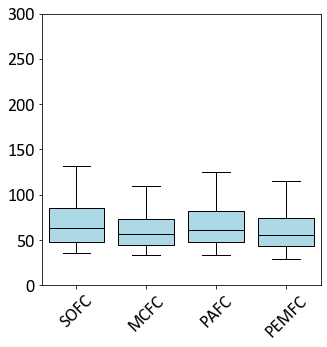

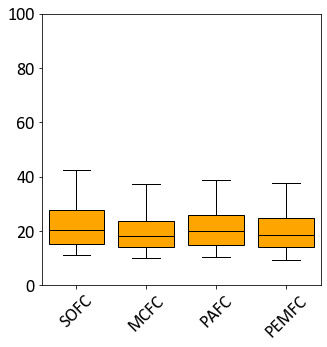

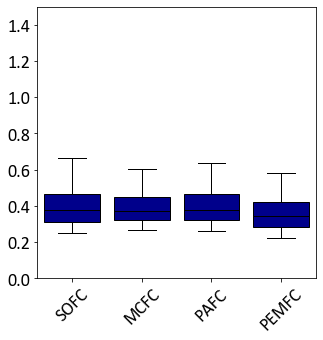

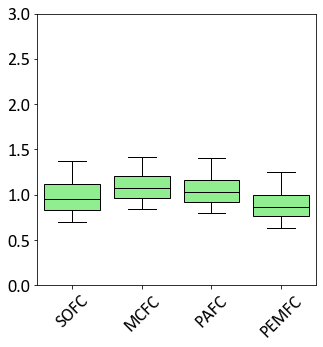

<IPython.core.display.Javascript object>

In [53]:
boxplot(gwp_pmc_lca, "lightblue", 0, 300)
savefig("mc_RE_gwp_lca.png")
boxplot(fdp_pmc_lca, "orange", 0, 100)
savefig("mc_RE_fdp_lca.png")
boxplot(pmfp_pmc_lca, "darkblue", 0, 1.5)
savefig("mc_RE_pmfp_lca.png")
boxplot(ap_pmc_lca, "lightgreen", 0, 3)
savefig("mc_RE_ap_lca.png")

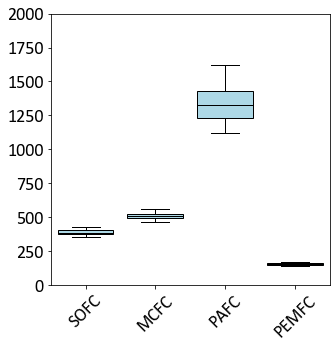

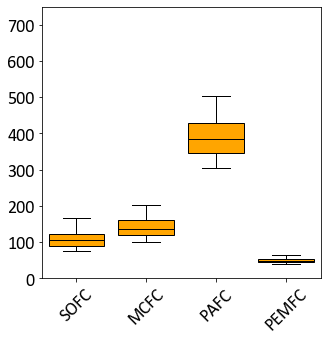

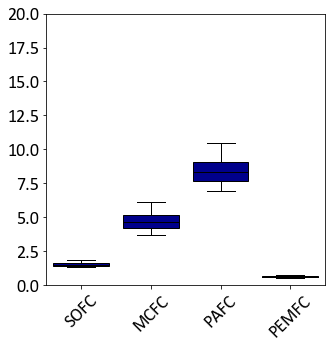

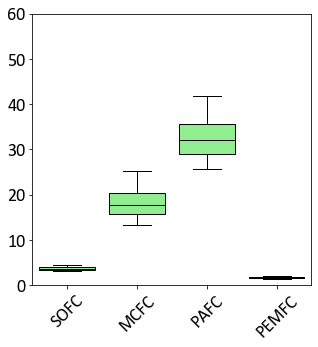

<IPython.core.display.Javascript object>

In [54]:
boxplot(manu_gwp_pmc, "lightblue", 0, 2000)
savefig("mc_RE_gwp_manu.png")
boxplot(manu_fdp_pmc, "orange", 0, 750)
savefig("mc_RE_fdp_manu.png")
boxplot(manu_pmfp_pmc, "darkblue", 0, 20)
savefig("mc_RE_pmfp_manu.png")
boxplot(manu_ap_pmc, "lightgreen", 0, 60)
savefig("mc_RE_ap_manu.png")

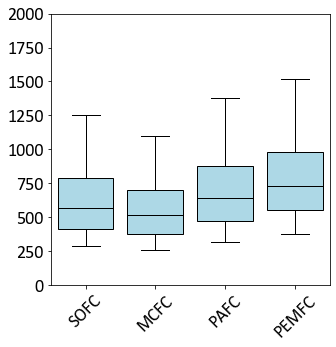

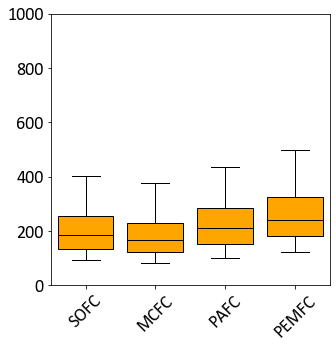

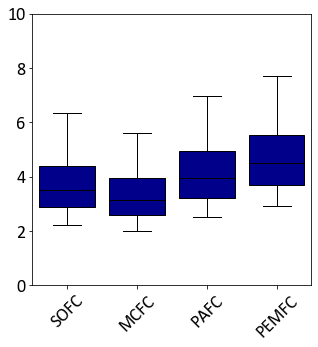

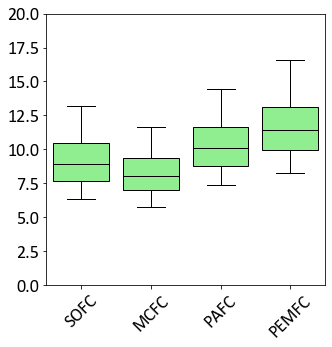

<IPython.core.display.Javascript object>

In [58]:
boxplot(op_gwp_pmc, "lightblue", 0, 2000)
savefig("mc_RE_gwp_op.png")
boxplot(op_fdp_pmc, "orange", 0, 1000)
savefig("mc_RE_fdp_op.png")
boxplot(op_pmfp_pmc, "darkblue", 0, 10)
savefig("mc_RE_pmfp_op.png")
boxplot(op_ap_pmc, "lightgreen", 0, 20)
savefig("mc_RE_ap_op.png")

#  Sensitivity Analysis

## Sensitivity to recycle rate

In [ ]:
def sce_calc(sce_name, database, LCIA_method):
    # setup scenario calculation for SOFC
    sce_act = [find_by_name(name, database) for name in sce_name]
    sce_fu = [{sce_act[i]: 1} for i in range(len(sce_act))]
    bw.calculation_setups["fc_sce"] = {"inv": sce_fu, "ia": LCIA_method}
    sce_results = bw.MultiLCA("fc_sce").results
    return sce_results


sce_name = ["Disposal_scen1", "Disposal_scen2", "Disposal_scen3", "Disposal_scen4"]
indicators

In [ ]:
sofc_sce = sce_calc(sce_name, SOFC_import, indicators)
mcfc_sce = sce_calc(sce_name, MCFC_import, indicators)
pafc_sce = sce_calc(sce_name, PAFC_import, indicators)
pemfc_sce = sce_calc(sce_name, PEMFC_import, indicators)

In [ ]:
allocation_factor = 0.700897254

In [ ]:
sce_df = pd.concat(
    [
        pd.DataFrame(sofc_sce),
        pd.DataFrame(mcfc_sce),
        pd.DataFrame(pafc_sce),
        pd.DataFrame(pemfc_sce),
    ],
    axis=1,
)*allocation_factor
sce_df.to_excel(r"D:\desktop\recycling rate scenario1.xlsx")

In [ ]:
temp = sce_df.transpose()
ls = np.reshape(np.arange(16), (4, 4))
temp0 = []
for i in range(4):
    temp0.append(temp.iloc[ls[:, i]])

temp0
sce_df1 = pd.concat([df for df in temp0], axis=0,)
sce_df1.to_excel(r"D:\desktop\recycling rate scenario.xlsx")

##  Sensitivity to sys expansion activity

In [ ]:
ls = [22244.4, 18559.5, 8659.5, 0, 18408.3, -2512.95]
sys_exp_sce1 = [
    act
    for act in eidb
    if "heat production, air-water heat pump 10kW" in act["name"]
    and "RoW" in act["location"]
][0]
sys_exp_sce2 = [
    act
    for act in eidb
    if "heat production, biogas, at diffusion absorption heat pump 4kW, future"
    in act["name"]
][0]
baseCase_fu = []
sys_sce1_fu = []
sys_sce2_fu = []
for num in range(len(ls)):
    sys_sce1_fu.append({sys_exp_sce1: ls[num]})
    sys_sce2_fu.append({sys_exp_sce2: ls[num]})
    baseCase_fu.append({sysExp[0]: ls[num]})
sys_sce1_fu, sys_sce2_fu, baseCase_fu

In [ ]:
bw.calculation_setups["baseCase"] = {"inv": baseCase_fu, "ia": indicators}
baseCase_results = bw.MultiLCA("baseCase").results
baseCase_results

In [ ]:
bw.calculation_setups["sys_sce1"] = {"inv": sys_sce1_fu, "ia": indicators}
sys_sce1_results = bw.MultiLCA("sys_sce1").results
sys_sce1_results

In [ ]:
bw.calculation_setups["sys_sce2"] = {"inv": sys_sce2_fu, "ia": indicators}
sys_sce2_results = bw.MultiLCA("sys_sce2").results
sys_sce2_results

In [ ]:
indexes = ["SOFC", "MCFC", "PAFC", "PEMFC", "NGCC", "micro GT"]
columns = ["GHG emission", "fossil depletion", "paticle formation", "acidification"]
df_baseCase = pd.DataFrame(baseCase_results, index=indexes, columns=columns)
df_sys_sce1 = pd.DataFrame(sys_sce1_results, index=indexes, columns=columns)
df_sys_sce2 = pd.DataFrame(sys_sce2_results, index=indexes, columns=columns)
sys_sce_results = pd.concat([df_baseCase, df_sys_sce1, df_sys_sce2], axis=1)
sys_sce_results.to_excel(r"D:\desktop\sys_ex scenario.xlsx")

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, fraction=0.03, pad=0.05, ax=ax)
    # fraction 设置colorbar相对于图的大小，pad设置colorbar到图的距离
    cbar.ax.set_ylabel(
        cbarlabel, rotation=-90, va="bottom", fontsize=16, fontname="Calibri"
    )

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-90)
    plt.xticks(fontname="Calibri", fontsize=18)
    plt.yticks(fontname="Calibri", fontsize=18)
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [ ]:
index = list
tes = pd.read_excel(r"D:\desktop\test.xlsx", index_col=0)
tes

In [ ]:
fig, ax = plt.subplots()
im, cbar = heatmap(
    tes,
    ["Base case", "Scenario 1", "Scenario 2"],
    indexes,
    cmap="YlGn",
    cbarlabel="GHG emission (kg CO2 eq.)",
)
plt.savefig(
    r"D:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\gwp_sysexp.png",
    dpi=600,
    bbox_inches="tight",
)

## Sensitivity to technical performance 

In [36]:
ng_input_act = [
    act
    for act in eidb
    if "market for natural gas, low pressure" in act["name"]
    and "RoW" in act["location"]
    and "cubic meter" in act["unit"]
][0]
ng_input_act

'market for natural gas, low pressure' (cubic meter, RoW, None)

<IPython.core.display.Javascript object>

In [37]:
ng_input_amout = [1498.1, 1689.3, 1890.5, 2145.9]

<IPython.core.display.Javascript object>

In [43]:
[act for act in op_db]

[{'comment': '',
  'location': 'GLO',
  'production amount': 1.0,
  'unit': 'pcs',
  'name': 'electricity production',
  'exchanges': [{'name': 'electricity_sofc',
    'amount': 7000.0,
    'unit': 'kilowatt hour',
    'database': 'operation',
    'location': 'GLO',
    'type': 'technosphere',
    'input': ('operation', '6163a7dd5c299d2079b4fe36dd779be2'),
    'output': ('operation', '76ffaba81cec303303dc0339155829ca')},
   {'name': 'electricity_mcfc',
    'amount': 7000.0,
    'unit': 'kilowatt hour',
    'database': 'operation',
    'location': 'GLO',
    'type': 'technosphere',
    'input': ('operation', '779fc9e836edb4cd966ca6ea7c0f68e5'),
    'output': ('operation', '76ffaba81cec303303dc0339155829ca')},
   {'name': 'electricity_pafc',
    'amount': 7000.0,
    'unit': 'kilowatt hour',
    'database': 'operation',
    'location': 'GLO',
    'type': 'technosphere',
    'input': ('operation', '0b1c481afa0a8ed88c4e4516f73557e4'),
    'output': ('operation', '76ffaba81cec303303dc033915

<IPython.core.display.Javascript object>

In [43]:
# 找到需要改进的技术参数及其现在的值,并计算LCA
def get_tech_imp_LCA(act, imp_rate, ng_input_amount):
    ng_input_exc = [exc for exc in act.technosphere()][0]  # obtain current input
    act.technosphere().delete()  # delete previouse exchange
    ng_input_scenario = ng_input_amount * (1 + imp_rate)
    ng_input_sce = act.new_exchange(
        input=ng_input_act, amount=ng_input_scenario, type="technosphere"
    )
    ng_input_sce.save()

    act_FU = [{act: 1}]
    name = [act.as_dict()["name"]]
    bw.calculation_setups["tech_imp_LCA"] = {"inv": act_FU, "ia": indicators}
    tech_imp_LCA = bw.MultiLCA("tech_imp_LCA").results
    df_tech_imp = pd.DataFrame(tech_imp_LCA, index=name, columns=ia_cat1)
    return df_tech_imp

<IPython.core.display.Javascript object>

In [48]:
operation = [i for i in op_db_import if i["name"] in op_foreground_name]

<IPython.core.display.Javascript object>

In [50]:
sofc_tech_imp1 = get_tech_imp_LCA(operation[0], 0.05, ng_input_amout[0])
mcfc_tech_imp1 = get_tech_imp_LCA(operation[1], 0.05, ng_input_amout[1])
pafc_tech_imp1 = get_tech_imp_LCA(operation[2], 0.05, ng_input_amout[2])
pemfc_tech_imp1 = get_tech_imp_LCA(operation[3], 0.05, ng_input_amout[3])
sofc_tech_imp2 = get_tech_imp_LCA(operation[0], 0.15, ng_input_amout[0])
mcfc_tech_imp2 = get_tech_imp_LCA(operation[1], 0.15, ng_input_amout[1])
pafc_tech_imp2 = get_tech_imp_LCA(operation[2], 0.15, ng_input_amout[2])
pemfc_tech_imp2 = get_tech_imp_LCA(operation[3], 0.15, ng_input_amout[3])

df_tech_imp = pd.concat(
    [
        sofc_tech_imp1,
        mcfc_tech_imp1,
        pafc_tech_imp1,
        pemfc_tech_imp1,
        sofc_tech_imp2,
        mcfc_tech_imp2,
        pafc_tech_imp2,
        pemfc_tech_imp2,
    ],
    axis=0,
)
df_tech_imp.to_excel(
    r"D:\tencent_files\chrome_Download\Research\LCA\LCA SOFC\output\Efficiency_loss_scenarios1.xlsx"
)

<IPython.core.display.Javascript object>

In [60]:
find_by_name(op_foreground_name, op_db_import)

['electricity_pafc' (kilowatt hour, GLO, None),
 'electricity_pemfc' (kilowatt hour, GLO, None),
 'electricity_mcfc' (kilowatt hour, GLO, None),
 'electricity_sofc' (kilowatt hour, GLO, None)]

<IPython.core.display.Javascript object>

In [ ]:
biogas_input = [
    act
    for act in eidb
    if "methane, 96% by volume, from biogas, low pressure, at user" in act["name"]
    and "RoW" in act["location"]
][0]

In [ ]:
biogas_input

In [ ]:
def Scenario_LCA(activity, new_exchange, imp_rate, ng_input_amount):
    ng_input_exc = [exc for exc in activity.technosphere()][0]  # obtain
    activity.technosphere().delete()  # delete previouse exchange
    ng_input_scenario = ng_input_amount * (1 + imp_rate)
    ng_input_sce = activity.new_exchange(
        input=new_exchange, amount=ng_input_scenario, type="technosphere"
    )
    ng_input_sce.save()

    act_FU = [{activity: 1}]
    name = [activity.as_dict()["name"]]
    bw.calculation_setups["tech_imp_LCA"] = {"inv": act_FU, "ia": indicators}
    tech_imp_LCA = bw.MultiLCA("tech_imp_LCA").results
    df_tech_imp = pd.DataFrame(tech_imp_LCA, index=name, columns=ia_cat1)
    return df_tech_imp

In [ ]:
sofc_biogas_0 = Scenario_LCA(operation[0], biogas_input, 0, 47552.4)

In [ ]:
pd.DataFrame(sofc_biogas_0)

In [ ]:
list(operation[0].exchanges())

##  Calc Pearson's coeff of LCIA

In [ ]:
def pearson_corr(df_pmc_results):  # calc pearson's coefficients of LCIA results
    df_trans = df_pmc_results.transpose()
    df_trans_midpoint = df_trans
    results = df_trans_midpoint.corr(method="pearson")
    # 矩阵运算
    pear_diag = pd.DataFrame(np.diag(np.diag(results)))
    pear_tril = pd.DataFrame(np.tril(results, -1))
    pear_final = pear_tril + pear_diag
    masked_correlation = np.ma.array(pear_final, mask=pear_final == 0)
    pear_mid_final = pd.DataFrame(masked_correlation, index=columns, columns=columns)
    return pear_mid_final

In [ ]:
pearson_corr(.iloc[:4])

In [ ]:
pear_sofc = pearson_corr(manu_pmc.iloc[:4])
fig, ax = plt.subplots()
im, cbar = heatmap(pear_sofc, columns, columns, ax=ax, cmap="YlGn", cbarlabel="r-value")
plt.savefig(
    r"D:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\pear_sofc.png",
    dpi=600,
    bbox_inches="tight",
)

##  calc LCIA of other techs

In earlier works, I calculated LCIA of other technologies in comparison with Fuel cells. These are lately abondoned. 

In [112]:
ngcc_man = [
    act for act in eidb if "combined cycle" in act["name"] and "market" in act["name"]
]
ngcc_op_elec = [
    act
    for act in eidb
    if "heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical"
    in act["name"]
    and "RoW" in act["location"]
    and "kilowatt hour" in act["unit"]
]
ngcc_op_heat = [
    act
    for act in eidb
    if "heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical"
    in act["name"]
    and "RoW" in act["location"]
    and "heat" in act["reference product"]
]
sysExp = [
    act
    for act in eidb
    if "heat production, natural gas, at boiler modulating <100kW" in act["name"]
    and "RoW" in act["location"]
    and "" in act["unit"]
]
ngcc = ngcc_man + ngcc_op_elec + ngcc_op_heat + sysExp
ngcc_fu = [
    {ngcc[0]: 1 / 400000},
    {ngcc[1]: 7000},
    {ngcc[2]: 19051.2},
    {ngcc[3]: 18408.25946},
]
bw.calculation_setups["ngcc"] = {"inv": ngcc_fu, "ia": ReCiPe}
ngcc_lca = bw.MultiLCA("ngcc").results
ix = [
    "ngcc_manufacturting",
    "ngcc_op_electricity",
    "ngcc_op_heat",
    "system_expansion",
]
ngcc_results = pd.DataFrame(data=ngcc_lca, columns=ReCiPe, index=ix,)
ngcc_results

ngcc = pd.concat(
    [
        ngcc_results.iloc[0],
        ngcc_results.iloc[1] + ngcc_results.iloc[2],
        ngcc_results.iloc[3],
    ],
    axis=1,
)
ngcc_final = pd.DataFrame(ngcc)
ngcc_final

['market for gas power plant, combined cycle, 400MW electrical' (unit, GLO, None),
 'heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical' (kilowatt hour, RoW, None),
 'heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical' (megajoule, RoW, None),
 'heat production, natural gas, at boiler modulating <100kW' (megajoule, RoW, None)]

<IPython.core.display.Javascript object>

In [116]:
microGT_man = [
    act
    for act in eidb
    if "market for micro gas turbine, 100kW electrical" in act["name"]
]
microGT_op_elec = [
    act
    for act in eidb
    if "natural gas, burned in micro gas turbine, 100kWe" in act["name"]
    and "CH" in act["location"]
    and "kilowatt hour" in act["unit"]
]
microGT_op_heat = [
    act
    for act in eidb
    if "natural gas, burned in micro gas turbine, 100kWe" in act["name"]
    and "CH" in act["location"]
    and "heat" in act["reference product"]
]
microGT = microGT_man + microGT_op_elec + microGT_op_heat + sysExp
microGT_fu = [
    {microGT[0]: 1 / 100},
    {microGT[1]: 7000},
    {microGT[2]: 39972.41379},
    {microGT[3]: -2512.954334},
]
bw.calculation_setups["microGT"] = {"inv": microGT_fu, "ia": ReCiPe}
microGT_lca = bw.MultiLCA("microGT").results

<IPython.core.display.Javascript object>

In [117]:
microGT_results = pd.DataFrame(
    data=microGT_lca,
    columns=ReCiPe,
    index=[
        "microGT_manufacturting",
        "microGT_op_elec",
        "microGT_op_heat",
        "system_expansion",
    ],
)
microGT_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
microGT_manufacturting,53.723753,276.575773,47.739496,0.036061,99.704203,8.571535,171.582412,49.222627,0.159765,11.942182,0.050626,-0.016917,0.000009,0.804206,0.834801,1.496094,2.160715,1.578637,47.296375
microGT_op_elec,13.667224,85.186238,13.424004,0.031786,26.710133,7.141190,4750.248120,2338.647575,0.058191,11.642008,0.161171,-0.011361,0.000628,1.380652,5.472477,3.710482,2.259123,1.153642,467.656633
microGT_op_heat,3.678450,22.927350,3.612988,0.008555,7.188868,1.922009,1278.498975,629.432093,0.015662,3.133373,0.043378,-0.003058,0.000169,0.371594,1.472882,0.998653,0.608029,0.310495,125.866802
system_expansion,-0.860732,-5.869984,-0.807812,-0.001640,-1.569699,-0.476924,-186.329176,-90.855332,-0.005050,-0.968956,-0.005550,0.000778,-0.000024,-0.056513,-0.178461,-0.138149,-0.112054,-0.073466,-18.322032


<IPython.core.display.Javascript object>

In [118]:
microGT = pd.concat(
    [
        microGT_results.iloc[0],
        microGT_results.iloc[1] + microGT_results.iloc[2],
        microGT_results.iloc[3],
    ],
    axis=1,
)
microGT_final = pd.DataFrame(microGT)
microGT_final.head()

,microGT_manufacturting,0,system_expansion
"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)",53.723753,17.345674,-0.860732
"(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)",276.575773,108.113588,-5.869984
"(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)",47.739496,17.036992,-0.807812
"(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)",0.036061,0.040341,-0.001640
"(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)",99.704203,33.899001,-1.569699


<IPython.core.display.Javascript object>

In [119]:
ngcc_final.to_excel(
    r"D:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\ngcc_export.xlsx"
)
microGT_final.to_excel(
    r"D:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\microGT_export.xlsx"
)

<IPython.core.display.Javascript object>